# Importamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### Definimos el autómata en la generación 0

In [7]:
L = 400
X = np.zeros(L)
X[:int(L/2)] = 1
np.random.shuffle(X)

### Definamos la regla 182 como una función e incluyendo las probabilidades

In [25]:
def random_rule_182(X:float,N:int,L:int):
    """
    rule_182 aplica la regla 182 de Wolfram durante N generaciones pero considera 
    una regla probabilística para generar cada nueva celda central

    :param X: autómata
    :param N: número de generaciones 
    :param L: largo del autómata celular unidimensional  
    :return: autómata celular en la generación N, X_N
    """ 
    X_N = np.zeros([N,L])
    X_N[0][:] = X
    
    # Definimos el set de probabilidades
    P = np.array([0.503, 0.863, 0.6, 0.6, 0.653, 0.733, 0.57, 0.94])
    #P = 0.57*np.ones(8)
    for gen in range(1,N):
        for i in range(1,L-1):
            Xleft = X_N[gen-1][i-1]
            Xright = X_N[gen-1][i+1]
            Xcenter = X_N[gen-1][i]
            Prob_iteration = np.random.rand(1,8)
            Prob = Prob_iteration[0][:]
            if Xleft==1 and Xcenter==1 and Xright ==1 and Prob[0]<P[0]:
                X_N[gen][i]=1
            if Xleft==1 and Xcenter==1 and Xright ==0 and Prob[1]<P[1]:
                X_N[gen][i]=0
            if Xleft==1 and Xcenter==0 and Xright ==1 and Prob[2]<P[2]:
                X_N[gen][i]=1
            if Xleft==1 and Xcenter==0 and Xright ==0 and Prob[3]<P[3]:
                X_N[gen][i]=1
            if Xleft==0 and Xcenter==1 and Xright ==1 and Prob[4]<P[4]:
                X_N[gen][i]=0
            if Xleft==0 and Xcenter==1 and Xright ==0 and Prob[5]<P[5]:
                X_N[gen][i]=1
            if Xleft==0 and Xcenter==0 and Xright ==1 and Prob[6]<P[6]:
                X_N[gen][i]=1
            if Xleft==0 and Xcenter==0 and Xright ==0 and Prob[7]<P[7]:
                X_N[gen][i]=0
    return X_N

### Graficamos el aútomata celular

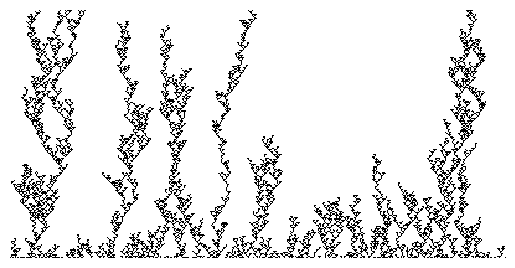

In [27]:
# Aplicamos la regla del autómata celular
gen = 200
X_N = random_rule_182(X,gen,L)

# Parámetros para graficar en dos colores
cmapmine = ListedColormap(['w', 'k'], N=2)

# Plot matrix, usamos np.flipud() para invertir el orden de las filas
plt.imshow(np.flipud(X_N), cmap=cmapmine, vmin=0, vmax=1)
ax = plt.gca()
ax.set_axis_off()
plt.show()